# XOR ESTIMATOR

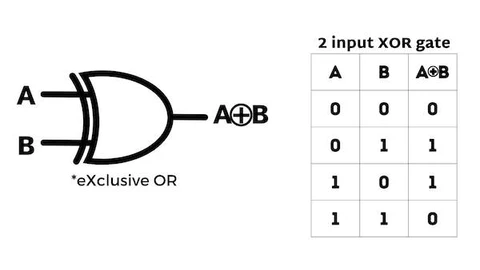

## Util Functions and Dependencies

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

## Training Architecture

In [ ]:
def initialize_weights_and_biases(input_size, hidden_size, output_size):
    # Inicialização de pesos e vieses com valores aleatórios pequenos
    np.random.seed(0)
    input_layer_weights = np.random.rand(input_size, hidden_size)
    input_layer_biases = np.random.rand(1, hidden_size)
    hidden_layer_weights = np.random.rand(hidden_size, output_size)
    hidden_layer_biases = np.random.rand(1, output_size)
    return input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases

def forward_propagation(X, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases):
    # Camada de entrada para camada escondida
    hidden_layer_input = np.dot(X, input_layer_weights) + input_layer_biases
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Camada escondida para camada de saída
    output_layer_input = np.dot(hidden_layer_output, hidden_layer_weights) + hidden_layer_biases
    #*** COMPLETE AQUI ***#

    return hidden_layer_output, output_layer_output

def backpropagation(X, y, hidden_layer_output, output_layer_output, input_layer_weights, hidden_layer_weights,
                    input_layer_biases, hidden_layer_biases, learning_rate):
    # Calcula o erro na camada de saída
    output_layer_error = y - output_layer_output
    output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_output)

    # Calcula o erro na camada escondida
    hidden_layer_error = output_layer_delta.dot(hidden_layer_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Atualiza pesos e vieses
    hidden_layer_weights += hidden_layer_output.T.dot(output_layer_delta) * learning_rate
    hidden_layer_biases += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate
    input_layer_weights += X.T.dot(hidden_layer_delta) * learning_rate
    input_layer_biases += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

def train(X, y, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases, learning_rate, epochs):
    for _ in range(epochs):

        #*** COMPLETE AQUI ***#
        backpropagation(X, y, hidden_layer_output, output_layer_output, input_layer_weights, hidden_layer_weights, input_layer_biases, hidden_layer_biases, learning_rate)

def predict(X, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases):
    _, output_layer_output = forward_propagation(X, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases)
    return output_layer_output


## Training

In [ ]:

# Dados de treinamento
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1

input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases = initialize_weights_and_biases(input_size, hidden_size, output_size)

learning_rate = 0.1
epochs = 10000

train(x, y, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases, learning_rate, epochs)


# Tests

In [ ]:
# Teste
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = predict(test_data, input_layer_weights, input_layer_biases, hidden_layer_weights, hidden_layer_biases)
print("Previsões:")
print(predictions)